<div class="alert alert-info">
    <h1>Analysis of Saturn's F Ring During the Cassini Mission</h1>
    <h1>Compare Cassini and Voyager Phase Curve Brightness</h1>

Robert S. French, rfrench@seti.org - Last updated April 10, 2024

Research performed under NASA Grant 80NSSC21K0527 for CDAP proposal "The Recent History of Saturn's Dusty Rings".
</div>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mplcursors
import numpy as np
import pandas as pd
import sys
if '..' not in sys.path: sys.path.append('..'); sys.path.append('../external')
    
from f_ring_util.f_ring import (add_hover,
                                compute_corrected_ew, 
                                fit_hg_phase_function, 
                                hg_func,
                                limit_by_quant,
                                print_hg_params,
                                read_ew_stats,
                                read_showalter_voyager_ew_stats,
                                scale_hg_phase_function)

%matplotlib widget
mpl.rcParams['figure.max_open_warning'] = 100

# Utility Functions

In [12]:
### SINGLE PLOTS ON AN AXIS - PHASE CURVE

def plot_points_cassini_voyager(c_obsdata, v1_obsdata, v2_obsdata, params,
                                title=None, col='Normal EW Mean', ax=None, **kwargs):
    """Plot scattered EW points for Cassini, V1, and V2."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))

    ax.scatter(c_obsdata['Mean Phase'], c_obsdata[col], marker='o', 
               s=5, color='black', alpha=0.3, label='Cassini')
    p = ax.scatter(v1_obsdata['Mean Phase'], v1_obsdata[col], marker='^', 
                   s=5, color='green', alpha=1, label='V1')
    add_hover(v1_obsdata, p)
    p = ax.scatter(v2_obsdata['Mean Phase'], v2_obsdata[col], marker='^', 
                   s=5, color='red', alpha=1, label='V2')
    add_hover(v2_obsdata, p)
    if params is not None:
        scale_c = scale_hg_phase_function(params, c_obsdata)
        scale_v1 = scale_hg_phase_function(params, v1_obsdata)
        print('xxx')
        scale_v2 = scale_hg_phase_function(params, v2_obsdata)
        print(f'Cassini scale:   {scale_c:.3f}')
        print(f'Voyager 1 scale: {scale_v1:.3f}')
        print(f'Voyager 2 scale: {scale_v2:.3f}')
        xrange = np.arange(c_obsdata['Mean Phase'].min(), c_obsdata['Mean Phase'].max()+1)
        phase_model = hg_func(params, xrange)
        ax.plot(xrange, phase_model*scale_c, '-', color='grey', lw=2)
        ax.plot(xrange, phase_model*scale_v1, '-', color='green', lw=2)
        ax.plot(xrange, phase_model*scale_v2, '-', color='red', lw=2)
        print(f'Voyager 1 / Voyager 2: {scale_v1/scale_v2:.3f}')
        print(f'Cassini / Voyager 1: {scale_c/scale_v1:.3f}')
        print(f'Cassini / Voyager 2: {scale_c/scale_v2:.3f}')
    ax.legend()
    ax.set_yscale('log')
    ax.set_xlim(0, 180)
    ax.set_ylim(.07, 30)
    ax.set_xlabel('Phase Angle (°)')
    ax.set_ylabel(col)
    if title is not None:
        plt.title(title)

In [13]:
obsdata_60_0 = read_ew_stats('../data_files/cass_ew_60_0.csv',
                             obslist_filename='CASSINI_OBSERVATION_LIST',
                             obslist_column='For Photometry')
print()
obsdata_0_1 = read_ew_stats('../data_files/cass_ew_0_1.csv',
                            obslist_filename='CASSINI_OBSERVATION_LIST',
                            obslist_column='For Photometry')
obsdata_0_1_mean = obsdata_0_1.groupby('Observation').mean(numeric_only=True)

** SUMMARY STATISTICS - ../data_files/cass_ew_60_0.csv **
Unique observation names: 157
Total slices: 157
Starting date: 2004-06-20 19:15:28
Ending date: 2017-09-06 11:47:07
Time span: 4825 days 16:31:39

** SUMMARY STATISTICS - ../data_files/cass_ew_0_1.csv **
Unique observation names: 212
Total slices: 39129
Starting date: 2004-06-20 19:15:28
Ending date: 2017-09-07 21:51:55
Time span: 4827 days 02:36:27


# Compare Cassini and New Voyager

In [14]:
v1_obsdata_0_1 = read_ew_stats('../data_files/v1_ew_0_1.csv')
print()
v2_obsdata_0_1 = read_ew_stats('../data_files/v2_ew_0_1.csv')
v1_obsdata_0_1_mean = v1_obsdata_0_1.groupby('Observation').mean(numeric_only=True)
v2_obsdata_0_1_mean = v2_obsdata_0_1.groupby('Observation').mean(numeric_only=True)

** SUMMARY STATISTICS - ../data_files/v1_ew_0_1.csv **
Unique observation names: 17
Total slices: 837
Starting date: 1980-11-08 01:13:49
Ending date: 1980-11-17 05:04:13
Time span: 9 days 03:50:24

** SUMMARY STATISTICS - ../data_files/v2_ew_0_1.csv **
Unique observation names: 18
Total slices: 529
Starting date: 1981-08-19 03:36:44
Ending date: 1981-08-29 13:08:28
Time span: 10 days 09:31:44


g1 =  0.676 / scale1 =  1.566 / weight1 = 0.613 
g2 =  0.048 / scale2 =  0.988 / weight2 = 0.387  Avg scale 1.277
xxx
Cassini scale:   1.000
Voyager 1 scale: 0.473
Voyager 2 scale: 0.408
Voyager 1 / Voyager 2: 1.160
Cassini / Voyager 1: 2.114
Cassini / Voyager 2: 2.453


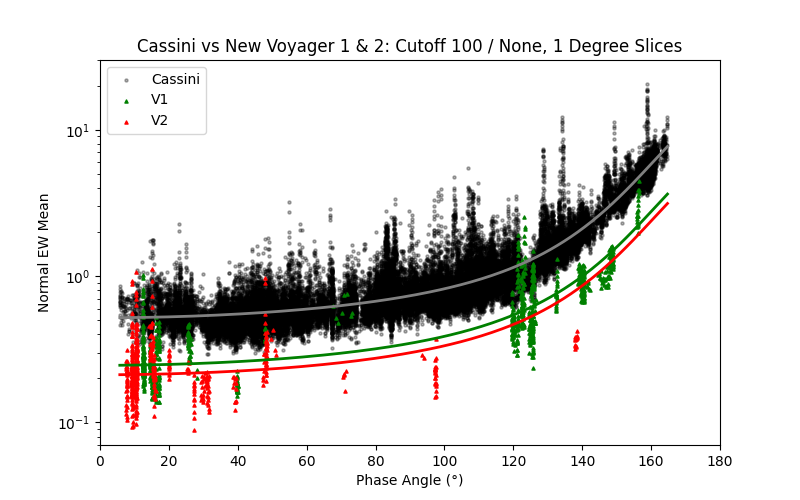

In [15]:
cutoff1 = 100
cutoff2 = None
obsdata_limited = limit_by_quant(obsdata_0_1, cutoff1, cutoff2)
params_master, _, _ = fit_hg_phase_function(2, None, obsdata_limited)
print_hg_params(params_master)
plot_points_cassini_voyager(obsdata_limited, v1_obsdata_0_1, v2_obsdata_0_1, params_master,
                            title=f'Cassini vs New Voyager 1 & 2: Cutoff {cutoff1} / {cutoff2}, 1 Degree Slices')

g1 =  0.677 / scale1 =  1.423 / weight1 = 0.645 
g2 =  0.021 / scale2 =  0.782 / weight2 = 0.355  Avg scale 1.102
xxx
Cassini scale:   1.000
Voyager 1 scale: 0.552
Voyager 2 scale: 0.473
Voyager 1 / Voyager 2: 1.166
Cassini / Voyager 1: 1.812
Cassini / Voyager 2: 2.114


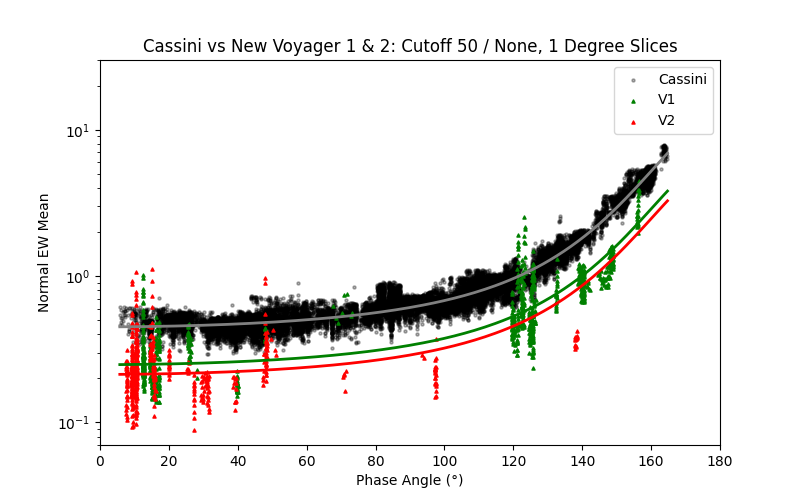

In [16]:
cutoff1 = 50
cutoff2 = None
obsdata_limited = limit_by_quant(obsdata_0_1, cutoff1, cutoff2)
params_master, _, _ = fit_hg_phase_function(2, None, obsdata_limited)
print_hg_params(params_master)
plot_points_cassini_voyager(obsdata_limited, v1_obsdata_0_1, v2_obsdata_0_1, params_master,
                            title=f'Cassini vs New Voyager 1 & 2: Cutoff {cutoff1} / {cutoff2}, 1 Degree Slices')

g1 =  0.681 / scale1 =  1.577 / weight1 = 0.602 
g2 =  0.066 / scale2 =  1.042 / weight2 = 0.398  Avg scale 1.309
xxx
Cassini scale:   1.000
Voyager 1 scale: 0.532
Voyager 2 scale: 0.398
Voyager 1 / Voyager 2: 1.335
Cassini / Voyager 1: 1.879
Cassini / Voyager 2: 2.510


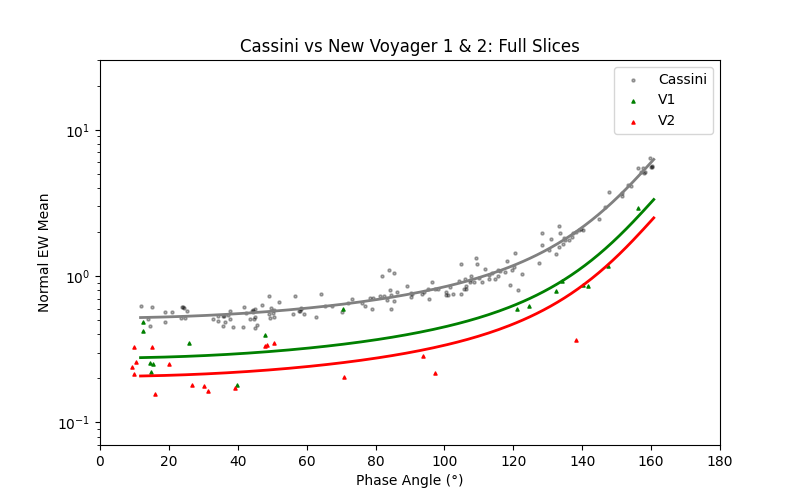

In [17]:
cutoff1 = 100
cutoff2 = None
obsdata_limited = limit_by_quant(obsdata_60_0, cutoff1, cutoff2)
params_master, _, _ = fit_hg_phase_function(2, None, obsdata_limited)
print_hg_params(params_master)
plot_points_cassini_voyager(obsdata_60_0, v1_obsdata_0_1_mean, v2_obsdata_0_1_mean, params_master,
                            title='Cassini vs New Voyager 1 & 2: Full Slices')

# Compare Cassini and Old Voyager

In [18]:
v1_old_obsdata = read_showalter_voyager_ew_stats('../observation_lists/SHOWALTER_VOYAGER_PHOT_V1.TAB')
print()
v2_old_obsdata = read_showalter_voyager_ew_stats('../observation_lists/SHOWALTER_VOYAGER_PHOT_V2.TAB')

** SUMMARY STATISTICS - ../observation_lists/SHOWALTER_VOYAGER_PHOT_V1.TAB **
Unique FDS: 25

** SUMMARY STATISTICS - ../observation_lists/SHOWALTER_VOYAGER_PHOT_V2.TAB **
Unique FDS: 42


g1 =  0.676 / scale1 =  1.566 / weight1 = 0.613 
g2 =  0.048 / scale2 =  0.988 / weight2 = 0.387  Avg scale 1.277
xxx
Cassini scale:   1.000
Voyager 1 scale: 0.674
Voyager 2 scale: 0.389
Voyager 1 / Voyager 2: 1.733
Cassini / Voyager 1: 1.483
Cassini / Voyager 2: 2.570


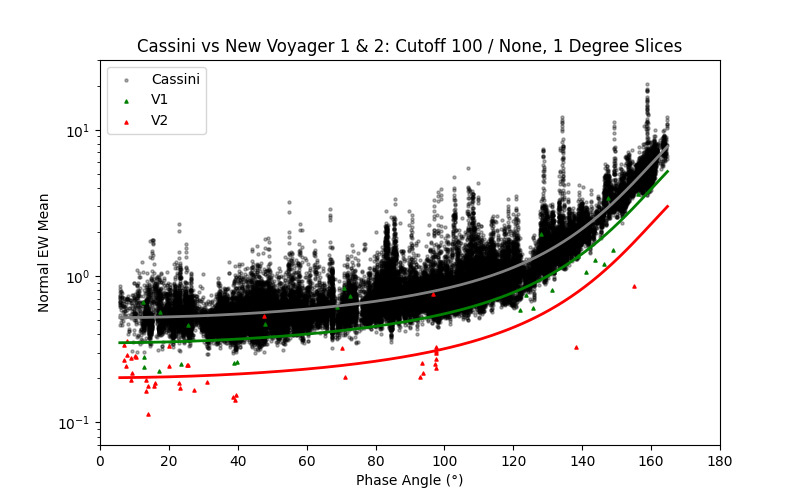

In [19]:
cutoff1 = 100
cutoff2 = None
obsdata_limited = limit_by_quant(obsdata_0_1, cutoff1, cutoff2)
params_master, _, _ = fit_hg_phase_function(2, None, obsdata_limited)
print_hg_params(params_master)
plot_points_cassini_voyager(obsdata_limited, v1_old_obsdata, v2_old_obsdata, params_master,
                            title=f'Cassini vs New Voyager 1 & 2: Cutoff {cutoff1} / {cutoff2}, 1 Degree Slices')

g1 =  0.677 / scale1 =  1.423 / weight1 = 0.645 
g2 =  0.021 / scale2 =  0.782 / weight2 = 0.355  Avg scale 1.102
xxx
Cassini scale:   1.000
Voyager 1 scale: 0.785
Voyager 2 scale: 0.455
Voyager 1 / Voyager 2: 1.724
Cassini / Voyager 1: 1.274
Cassini / Voyager 2: 2.197


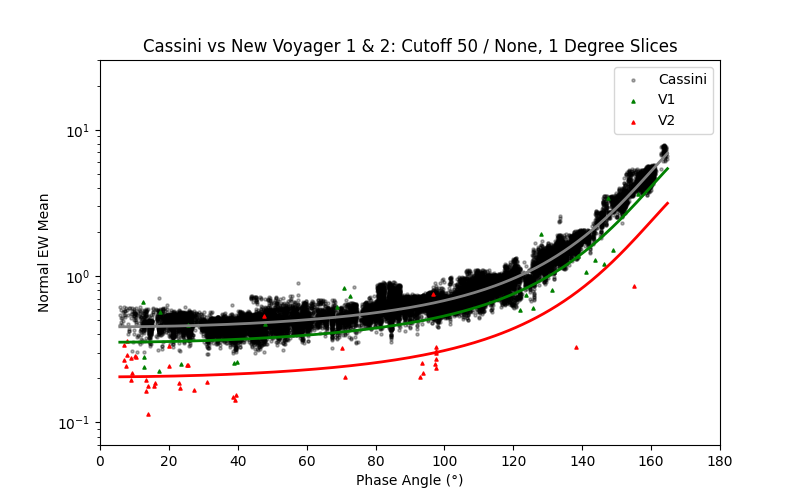

In [20]:
cutoff1 = 50
cutoff2 = None
obsdata_limited = limit_by_quant(obsdata_0_1, cutoff1, cutoff2)
params_master, _, _ = fit_hg_phase_function(2, None, obsdata_limited)
print_hg_params(params_master)
plot_points_cassini_voyager(obsdata_limited, v1_old_obsdata, v2_old_obsdata, params_master,
                            title=f'Cassini vs New Voyager 1 & 2: Cutoff {cutoff1} / {cutoff2}, 1 Degree Slices')

g1 =  0.681 / scale1 =  1.577 / weight1 = 0.602 
g2 =  0.066 / scale2 =  1.042 / weight2 = 0.398  Avg scale 1.309
xxx
Cassini scale:   1.000
Voyager 1 scale: 0.664
Voyager 2 scale: 0.386
Voyager 1 / Voyager 2: 1.724
Cassini / Voyager 1: 1.505
Cassini / Voyager 2: 2.594


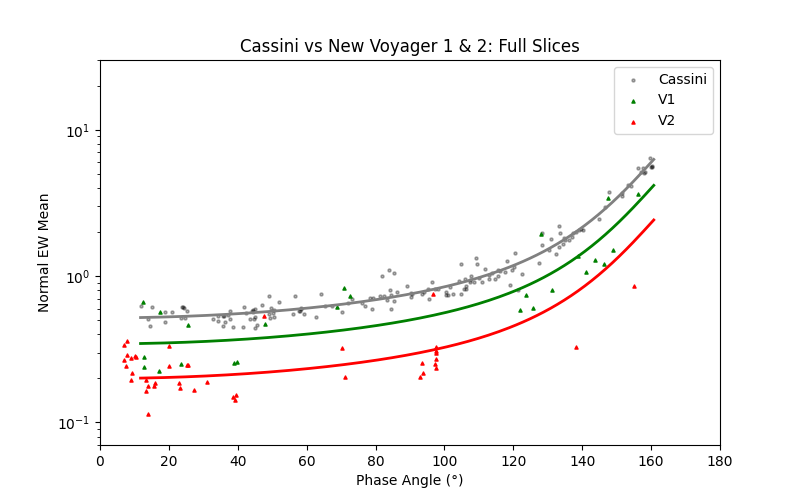

In [21]:
cutoff1 = 100
cutoff2 = None
obsdata_limited = limit_by_quant(obsdata_60_0, cutoff1, cutoff2)
params_master, _, _ = fit_hg_phase_function(2, None, obsdata_limited)
print_hg_params(params_master)
plot_points_cassini_voyager(obsdata_60_0, v1_old_obsdata, v2_old_obsdata, params_master,
                            title='Cassini vs New Voyager 1 & 2: Full Slices')